In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
# Загрузка датасета
data = pd.read_csv('train - train.csv')

C:\Users\cpu\AppData\Local\Temp\ipykernel_10180\2158651101.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train - train.csv')


In [4]:
# Исследование датасета
print(data.head(2))

       ID Customer_ID     Month           Name Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh  23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh  23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                 26.82262  22 Years and 1 Months   
1            809.98                 31.94496                    NaN   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949             80.41529544   
1                     No           49.574949             118.2802216   

                 Payment_Behaviour Monthly_Balance Credit_Score  
0  High_spent_Small_value_payment

In [5]:
print(data.describe())

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633330        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

In [6]:
# Определение наличия пропущенных значений
print(data.isnull().sum())
# Проверьте на содержвание символа "_" 

# Возможно некоторые стоблцы должны иметь числовое значение, но они имеют строковые значения. Обработайте
# Если посчитаете нужным , можете удалить некоторые стоблцы. 

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [8]:
# Проверка наличия символа "_" в значениях во всех столбцах, не учитывая названия столбцов
columns_with_underscore_values = []
for column in data.columns:
    if any(data[column].astype(str).str.contains('_')):
        columns_with_underscore_values.append(column)

# Вывод столбцов с данными, содержащими символ "_"
print("Столбцы с данными, содержащими символ '_':", columns_with_underscore_values)


Столбцы с данными, содержащими символ '_': ['Customer_ID', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']


In [12]:
# Удаление символа "_" из значений во всех столбцах, содержащих его
for column in columns_with_underscore_values:
    data[column] = data[column].str.replace('_', '')

# Вывод первых нескольких строк DataFrame для проверки изменений
print(data.head(11))


        ID Customer_ID     Month             Name   Age          SSN  \
0   0x1602    CUS0xd40   January    Aaron Maashoh    23  821-00-0265   
1   0x1603    CUS0xd40  February    Aaron Maashoh    23  821-00-0265   
2   0x1604    CUS0xd40     March    Aaron Maashoh  -500  821-00-0265   
3   0x1605    CUS0xd40     April    Aaron Maashoh    23  821-00-0265   
4   0x1606    CUS0xd40       May    Aaron Maashoh    23  821-00-0265   
5   0x1607    CUS0xd40      June    Aaron Maashoh    23  821-00-0265   
6   0x1608    CUS0xd40      July    Aaron Maashoh    23  821-00-0265   
7   0x1609    CUS0xd40    August              NaN    23    #F%$D@*&8   
8   0x160e   CUS0x21b1   January  Rick Rothackerj    28  004-07-5839   
9   0x160f   CUS0x21b1  February  Rick Rothackerj    28  004-07-5839   
10  0x1610   CUS0x21b1     March  Rick Rothackerj    28  004-07-5839   

   Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0   Scientist      19114.12            1824.843333       

In [17]:
# Проверка наличия символа "-" в значениях во всех столбцах, не учитывая названия столбцов
columns_with_hyphen_values = []
for column in data.columns:
    if any(data[column].astype(str).str.contains('-')):
        columns_with_hyphen_values.append(column)

# Вывод столбцов с данными, содержащими символ "-"
print("Столбцы с данными, содержащими символ '-':", columns_with_hyphen_values)


Столбцы с данными, содержащими символ '-': ['Name', 'SSN', 'Num_Bank_Accounts', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Monthly_Balance']


In [23]:
# Список столбцов, из которых нужно удалить символ "-"
columns_to_clean = ["Age","SSN", "Num_Bank_Accounts", "Num_of_Loan", "Type_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Monthly_Balance"]

for column in columns_to_clean:
    # Преобразование значений в строковый тип
    data[column] = data[column].astype(str)
    # Удаление символа "-" из значений
    data[column] = data[column].str.replace('-', '')

# Вывод первых нескольких строк DataFrame для проверки изменений
print(data.head())


       ID Customer_ID     Month           Name  Age        SSN Occupation  \
0  0x1602    CUS0xd40   January  Aaron Maashoh   23  821000265  Scientist   
1  0x1603    CUS0xd40  February  Aaron Maashoh   23  821000265  Scientist   
2  0x1604    CUS0xd40     March  Aaron Maashoh  500  821000265  Scientist   
3  0x1605    CUS0xd40     April  Aaron Maashoh   23  821000265  Scientist   
4  0x1606    CUS0xd40       May  Aaron Maashoh   23  821000265  Scientist   

  Annual_Income  Monthly_Inhand_Salary Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                 3  ...               
1      19114.12                    NaN                 3  ...        Good   
2      19114.12                    NaN                 3  ...        Good   
3      19114.12                    NaN                 3  ...        Good   
4      19114.12            1824.843333                 3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0  

In [24]:
columns_with_hyphen_values = [col for col in data.columns if data[col].astype(str).str.contains('-').any()]
if not columns_with_hyphen_values:
    print("Символ '-' не найден в данных")
else:
    print("Обнаружен символ '-' в следующих столбцах:",columns_with_hyphen_values )


Обнаружен символ '-' в следующих столбцах: ['Name', 'Changed_Credit_Limit']


In [25]:
data.drop(['ID','Month','SSN','Name'],axis=1,inplace=True)
data.columns


Index(['Customer_ID', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
# Определим столбцы, которые нужно преобразовать в числовой формат
# Проверим тип данных каждого столбца и выявим строки
columns_to_convert = []
for col in data.columns:
    if data[col].dtype == 'object':
        columns_to_convert.append(col)

print("Столбцы, которые нужно преобразовать в числовой формат:")
print(columns_to_convert)



Столбцы, которые нужно преобразовать в числовой формат:
['Customer_ID', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [8]:
print(data.dtypes)

Customer_ID                  object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object


In [9]:
# Определим столбцы, которые нужно преобразовать в числовой формат
columns_to_convert = ['Age','Occupation']  # Замените на фактические имена столбцов

# Преобразуем строки в числа
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Проверим, что преобразование прошло успешно
print(data.dtypes)


Customer_ID                  object
Age                         float64
Occupation                  float64
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object


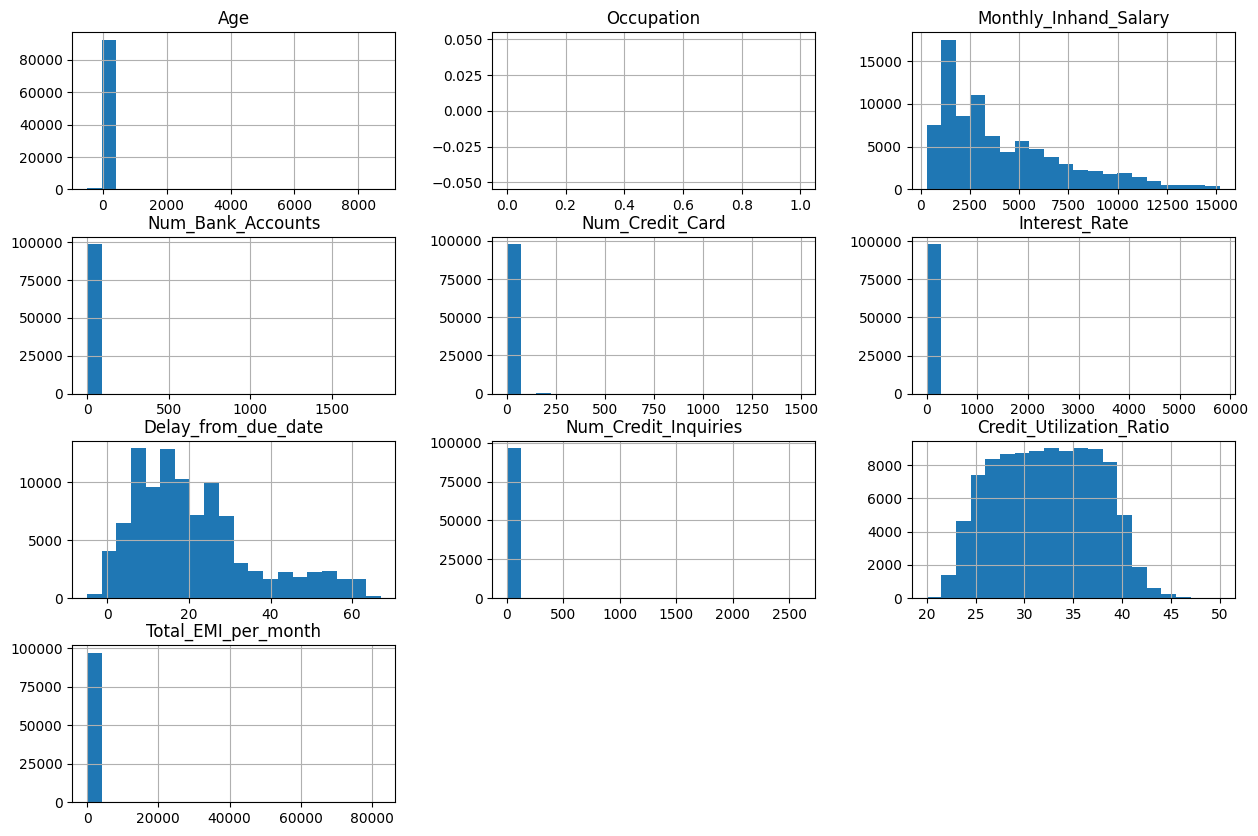

In [10]:
# Построение гистограмм числовых признаков
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()


In [11]:
# Обучите модель алгоритмоми классификации: Log Reg, Decision Tree, Random Forest 
# Выбор целевой переменной
y = data['Credit_Score']

# Выбор признаков
X = data.drop('Credit_Score', axis=1)
from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
from sklearn.linear_model import LogisticRegression

# Создание модели логистической регрессии
logistic_model = LogisticRegression()

# Обучение модели на обучающем наборе
logistic_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
logistic_predictions = logistic_model.predict(X_test)

# Оценка производительности модели
from sklearn.metrics import accuracy_score

accuracy_logistic = accuracy_score(y_test, logistic_predictions)
print("Accuracy Logistic Regression:", accuracy_logistic)


ValueError: could not convert string to float: 'CUS_0x475f'

In [ ]:
# Предсказание на тестовом наборе (например, accuracy, precision, recall, F1-score).

In [ ]:
# Проанализируйте результаты и сделайте выводы о качестве модели.